<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## After changing dependencies

```sh
pip install fastAIcourse
```

```sh
pip install -e '.[dev]'
```

## AI Types

- Multi layer preception (MLP)
- Convolution Neural Network (CNN) ex. ResNET, VGG

## Structure

1. Data process
   - Normalise
   - Remove NAN
4. Create Model
   - try decision tree - random forest

5. Run model

## Model structure

1. train/test split
   - asd
3. initalise random weights
4. calculate loss
5. Gradient descent - recalculate weights
6. Repeat steps 2 - 4

In [ ]:
#| eval: false
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device("cuda:0")
device

'cuda'

[<matplotlib.lines.Line2D>]

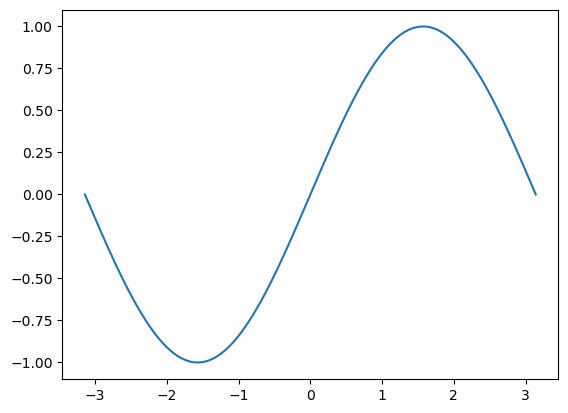

In [ ]:
#| eval: false
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)
plt.plot
plt.plot(x.detach().cpu(),y.detach().cpu())

In [ ]:
#| eval: false
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
from torch import tensor

a = tensor([1], dtype=dtype, requires_grad=True)
b = tensor([0], dtype=dtype, requires_grad=True)
c = tensor([0], dtype=dtype, requires_grad=True)
d = tensor([0], dtype=dtype, requires_grad=True)

a,b,c,d

(tensor([1.], device='cuda:0', requires_grad=True),
 tensor([0.], device='cuda:0', requires_grad=True),
 tensor([0.], device='cuda:0', requires_grad=True),
 tensor([0.], device='cuda:0', requires_grad=True))

In [ ]:
#| eval: false
torch.abs(loss-a)

tensor([8.3212], device='cuda:0', grad_fn=<AbsBackward0>)

0 2999.5 2999.5
1 2633.0322265625 2633.0322265625
2 2440.7451171875 2440.7451171875
3 2299.944091796875 2299.944091796875
4 2184.31591796875 2184.31591796875
5 2086.458740234375 2086.458740234375
6 2002.959228515625 2002.959228515625
7 1931.475830078125 1931.475830078125
8 1870.134033203125 1870.134033203125
9 1817.367919921875 1817.367919921875
11 1732.486328125 1732.486328125
13 1668.533203125 1668.533203125
16 1599.33935546875 1599.33935546875
20 1537.807861328125 1537.807861328125
25 1486.8544921875 1486.8544921875
32 1436.569580078125 1436.569580078125
41 1384.7811279296875 1384.7811279296875
51 1332.85009765625 1332.85009765625
62 1278.809814453125 1278.809814453125
73 1227.13720703125 1227.13720703125
85 1173.205322265625 1173.205322265625
97 1121.6829833984375 1121.6829833984375
110 1068.4569091796875 1068.4569091796875
123 1017.7958984375 1017.7958984375
137 965.9642333984375 965.9642333984375
152 913.40380859375 913.40380859375
168 860.5406494140625 860.5406494140625
185 807.

[<matplotlib.lines.Line2D>]

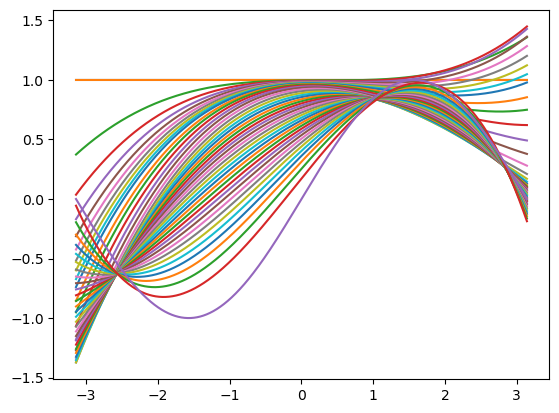

In [ ]:
#| eval: false
learning_rate = 1e-6

y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x.detach().cpu(),y_pred.detach().cpu())

previous_loss = tensor([0], dtype=dtype, requires_grad=True)

for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if torch.abs(previous_loss - loss) > 50:
        previous_loss = loss
        print(t, loss.item(), previous_loss.item())
        plt.plot(x.detach().cpu(),y_pred.detach().cpu())
        

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
plt.plot(x.detach().cpu(),y.detach().cpu())